In [1]:
import nltk
import matplotlib as plt
%matplotlib inline

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
text1.concordance('whale')

Displaying 25 of 1226 matches:
s , and to teach them by what name a whale - fish is to be called in our tongue
t which is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . This ani
ulted ." -- WEBSTER ' S DICTIONARY " WHALE . ... It is more immediately from th
ISH . WAL , DUTCH . HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALE
HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALEINE , FRENCH . BALLE
least , take the higgledy - piggledy whale statements , however authentic , in 
 dreadful gulf of this monster ' s ( whale ' s ) mouth , are immediately lost a
 patient Job ." -- RABELAIS . " This whale ' s liver was two cartloads ." -- ST
 Touching that monstrous bulk of the whale or ork we have received nothing cert
 of oil will be extracted out of one whale ." -- IBID . " HISTORY OF LIFE AND D
ise ." -- KING HENRY . " Very like a whale ." -- HAMLET . " Which to secure , n
restless paine , Like as the wounded whale to shore flies thro ' the maine ." -
. OF SPER

In [4]:
text1.similar('love')

sea man it ship by him hand them whale view ships land me life death
water way head nature fear


In [5]:
text2.similar('love')

affection sister heart mother time see town life it dear elinor
marianne me word family her him do regard head


In [6]:
text5.similar('lol')

join part hi hey and wb well ty lmao yeah hiya ok oh hello you what
yes haha no all


/Users/kaiprenger/venv/python_class_2022/lib/python3.9/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


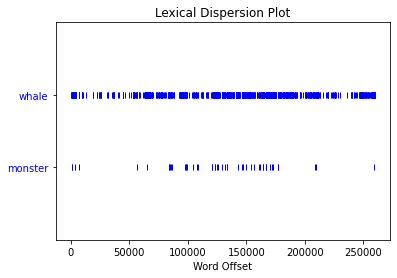

In [7]:
text1.dispersion_plot(['whale', 'monster'])

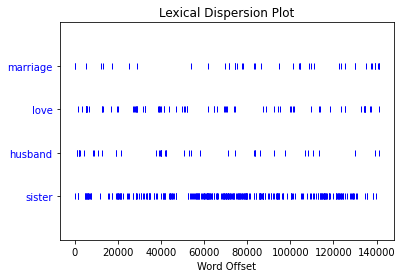

In [8]:
text2.dispersion_plot(['marriage', 'love', 'husband', 'sister'])

In [9]:
text1.count('whale')

906

In [10]:
text1.count('Whale')

282

In [11]:
text1.count('WHALE')

38

In [12]:
text1_tokens = []
for t in text1:
    if t.isalpha():
        t = t.lower()
        text1_tokens.append(t)

In [13]:
text1_tokens_comp = [t.lower() for t in text1 if t.isalpha()]

In [14]:
text1_tokens_comp.count('whale')

1226

In [15]:
# Double check tokens worked
text1_tokens.count('WHALE')

0

In [16]:
len(text1_tokens)

218361

In [17]:
len(text1)

260819

In [18]:
# Number of unique works in text1
len(set(text1_tokens))

16948

In [19]:
# Calculating lexical density as an approxiation of range of vocabulary (statiscally a good metric)
len(set(text1_tokens)) / len(text1_tokens)

0.07761459234936642

## Side note

Lexical density is helpful when comparing one work to another. However, because written texts are finite  vary in length, and some works are repetitive, you would run into trouble comparing a 1000 word text to 10,000 word text. It's important to limit samples by slicing.

In [20]:
text1_slice = text1_tokens[0:10000]

In [21]:
len(set(text1_slice)) / len(text1_slice)

0.2816

## Assignment: Challenge

Let’s compare the lexical density of Moby Dick with Sense and Sensibility. Make sure to:

1. Make all the words lowercase and remove punctuation.
2. Make a slice of the first 10,000 words.
3. Calculate lexical density by dividing the length of the set of the slice by the length of the slice.

In [22]:
# first, tokenize text2
text2_tokens = [t.lower for t in text2 if t.isalpha()]

In [23]:
# next, take a slice that matches the text1 slice
text2_slice = text2_tokens[:10000]

In [24]:
# finally, calculate lexical density
len(set(text2_slice)) / len(text2_slice)

0.9661

## Removing Stops Words

Our work thus far as included stop words and grammatical features in our analysis. Often, we want to remove those, because they don't add semantic content in our models, using the following steps.

1. Remove capitalization and punctuation (we’ve already done this).
2. Remove stop words.
3. Lemmatize (or stem) our words, i.e. “jumping” and “jumps” become “jump.” We already completed step one, and are now working with our text1_tokens. Remember, this variable, text1_tokens, contains a list of strings that we will work with. We want to remove the stop words from that list. The NLTK library comes with fairly comprehensive lists of stop words for many languages. Stop words are function words that contribute very little semantic meaning and most often have grammatical functions. Usually, these are function words such as determiners, prepositions, auxiliaries, and others. To use NLTK’s stop words, we need to import the list of words from the corpus. (We could have done this at the beginning of our program, and in more fully developed code, we would put it up there, but this works, too.) In the next cell, type:

In [26]:
# Here, nltk can help us
from nltk.corpus import stopwords

In [28]:
# Specify English stop words 
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
# Curious how many stop words are available
len(stop_words)

179

In [30]:
# Now, let's create a list of text1_tokens excluding stop words
text1_wo_stops = [t for t in text1_tokens if t not in stop_words]

In [31]:
# Check the difference with the stop words removed in a small sample
print(text1_tokens[:30])

['moby', 'dick', 'by', 'herman', 'melville', 'etymology', 'supplied', 'by', 'a', 'late', 'consumptive', 'usher', 'to', 'a', 'grammar', 'school', 'the', 'pale', 'usher', 'threadbare', 'in', 'coat', 'heart', 'body', 'and', 'brain', 'i', 'see', 'him', 'now']


In [32]:
print(text1_wo_stops[:30])

['moby', 'dick', 'herman', 'melville', 'etymology', 'supplied', 'late', 'consumptive', 'usher', 'grammar', 'school', 'pale', 'usher', 'threadbare', 'coat', 'heart', 'body', 'brain', 'see', 'ever', 'dusting', 'old', 'lexicons', 'grammars', 'queer', 'handkerchief', 'mockingly', 'embellished', 'gay', 'flags']


In [33]:
len(text1_wo_stops)

110459

In [34]:
len(set(text1_wo_stops))

16802

## Lemmatizing Words

Lemmatizing attempts to deal with gramatical variation in words by searching for the "root" of works. For instance, transforming plurals "cats" as "cat", "women" as "woman" or reducing tense variation like "sang" as "sing".

In [35]:
from nltk.stem import WordNetLemmatizer

In [39]:
# WorkNetLemmatizer is a class, so need to call a new instance of it
wordnet_lemmatizer = WordNetLemmatizer()

In [41]:
# Let's check out examples of how this works
wordnet_lemmatizer.lemmatize('children')

'child'

In [42]:
wordnet_lemmatizer.lemmatize('better')

'better'

In [43]:
# See above, it didn't seem to work
# We can pass in a part of speech (pos)
wordnet_lemmatizer.lemmatize('better', pos='a')    # a stands for adjective

'good'

In [44]:
text1_lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in text1_wo_stops]

In [46]:
print(len(text1_lemmatized))        # same as before
print(len(set(text1_lemmatized)))   # different due to consolidation with set of lemmantized list

110459
14750


In [47]:
# Now, inspect a short list sample of text1, aka Moby Dick
sorted(set(text1_lemmatized))[:30]

['aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandonedly',
 'abandonment',
 'abased',
 'abasement',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbreviate',
 'abbreviation',
 'abeam',
 'abed',
 'abednego',
 'abel',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abhorring',
 'abide',
 'abided',
 'abiding',
 'ability',
 'abjectly',
 'abjectus',
 'able']

#### Observation

Noticed items like `abandon`, `abandoned`, `abandonedly` and `abandonment` haven't been consolidated by lemmantizing. Stemming might be another process we can run on our cleaned up types list next.

## Stemming Words
Stemming the words will help somewhat in continuing to consolidate non-semantic variation.

In [48]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

In [49]:
# Let's see how well Porter Stemmer works.
print(porter_stemmer.stem('berry'))
print(porter_stemmer.stem('berries'))
print(wordnet_lemmatizer.lemmatize('berry'))
print(wordnet_lemmatizer.lemmatize('berries'))

berri
berri
berry
berry


In [50]:
# For academic purposes, stemming might not be that helpful, and often times lemmatizing is a better fit

In [51]:
t1_porter = [porter_stemmer.stem(t) for t in text1_lemmatized]

In [52]:
print(len(set(t1_porter))) # vs. 110459 for lemmatizing

10501


In [54]:
print(sorted(set(t1_porter))[:30])

['aback', 'abaft', 'abandon', 'abandonedli', 'abas', 'abash', 'abat', 'abbrevi', 'abe', 'abeam', 'abednego', 'abel', 'abhor', 'abhorr', 'abid', 'abil', 'abjectli', 'abjectu', 'abl', 'ablut', 'aboard', 'abod', 'abomin', 'aborigin', 'abort', 'abound', 'aboundingli', 'abraham', 'abreast', 'abridg']


In [55]:
# Yeah, some of the roots are hard to identify as English words

## Results

Let's try to understand some of our final results about text 1.

In [56]:
my_dist = FreqDist(text1_lemmatized)

In [57]:
type(my_dist)

nltk.probability.FreqDist

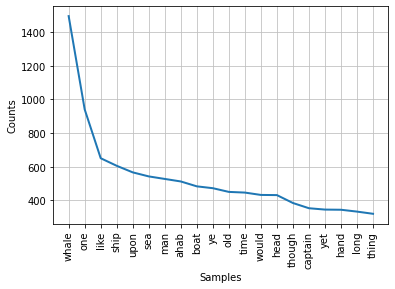

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
my_dist.plot(20)

In [60]:
# Look at 20 most common words with method
my_dist.most_common(20)

[('whale', 1494),
 ('one', 940),
 ('like', 650),
 ('ship', 605),
 ('upon', 566),
 ('sea', 542),
 ('man', 527),
 ('ahab', 512),
 ('boat', 483),
 ('ye', 472),
 ('old', 450),
 ('time', 446),
 ('would', 432),
 ('head', 431),
 ('though', 384),
 ('captain', 353),
 ('yet', 345),
 ('hand', 344),
 ('long', 333),
 ('thing', 320)]

In [64]:
# What if we were interested in biblical references
# create a list of keywords, then loop through our lemmantized list and append matches to a new list
b_words = ['god', 'apostle', 'angel']
my_list = []
for word in b_words:
    if word in text1_lemmatized:
        my_list.append(word)
my_list2 = [word for word in b_words if word in text1_lemmatized]

In [66]:
my_list == my_list2

True

## Make your own corpus

We will use the request library to pull in Don Quixote.

In [67]:
from urllib.request import urlopen

In [68]:
my_url = "http://www.gutenberg.org/files/996/996-0.txt"

In [70]:
file = urlopen(my_url)
raw = file.read()
don_quixote = raw.decode()

In [71]:
type(don_quixote)

str

In [72]:
print(don_quixote[:30])

﻿The Project Gutenberg eBook o


In [73]:
print(len(don_quixote))

2361839


In [74]:
# the text is a large string. Let's tokenize it
don_quixote_tokens = nltk.word_tokenize(don_quixote)

In [76]:
type(don_quixote_tokens)

list

In [77]:
len(don_quixote_tokens)

498739

In [78]:
don_quixote_tokens[:30]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'History',
 'of',
 'Don',
 'Quixote',
 ',',
 'by',
 'Miguel',
 'de',
 'Cervantes',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most']

In [83]:
# We can see that there's metadata at the beginning. Looks like the text begins on 320 index
dq_text = don_quixote_tokens[320:]
print(dq_text[:30])

['the', '“', 'Full', 'Size', '”', 'button', 'to', 'expand', 'them', 'to', 'their', 'original', 'dimensions', '.', 'Ormsby', 'in', 'his', 'Preface', 'has', 'criticized', 'the', 'fanciful', 'nature', 'of', 'Doré', '’', 's', 'illustrations', ';', 'others']


In [85]:
# If we want to use nltk functions, we'll need to convert this list to a text
dq_nltk_text = nltk.Text(dq_text)
type(dq_nltk_text)

nltk.text.Text

## Assignment: Challenge

Using the dq_text variable:

* Remove the stop words
* Remove punctuation
* Remove capitalization
* Lemmatize the words

In [88]:
# First, let's do all the core Python methods
# Loop over dq_text removing stop words, punctuation, and capitalization
dq_cleaning = [word.lower() for word in dq_text if word.isalpha() if word.lower() not in stop_words]

In [89]:
print(dq_cleaning[:30])

['full', 'size', 'button', 'expand', 'original', 'dimensions', 'ormsby', 'preface', 'criticized', 'fanciful', 'nature', 'doré', 'illustrations', 'others', 'feel', 'woodcuts', 'steel', 'engravings', 'well', 'match', 'quixote', 'dreams', 'full', 'size', 'contents', 'volume', 'introduction', 'prefaratory', 'cervantes', 'quixote']


In [92]:
dq_lemmantized = [wordnet_lemmatizer.lemmatize(i) for i in dq_cleaning]
print(dq_lemmantized[:30])

['full', 'size', 'button', 'expand', 'original', 'dimension', 'ormsby', 'preface', 'criticized', 'fanciful', 'nature', 'doré', 'illustration', 'others', 'feel', 'woodcut', 'steel', 'engraving', 'well', 'match', 'quixote', 'dream', 'full', 'size', 'content', 'volume', 'introduction', 'prefaratory', 'cervantes', 'quixote']


## Part-of-Speech Tagging

Part-of-Speech tagging requires stop words, so we'll be using `dq_text` rathre than `dq_cleaning`.

In [93]:
dq_tagged = nltk.pos_tag(dq_text)

In [94]:
print(dq_tagged[:10])

[('the', 'DT'), ('“', 'NNP'), ('Full', 'NNP'), ('Size', 'NNP'), ('”', 'NNP'), ('button', 'NN'), ('to', 'TO'), ('expand', 'VB'), ('them', 'PRP'), ('to', 'TO')]


In [102]:
tag_dict = {}
for (word, tag) in dq_tagged:
    if tag in tag_dict:
        tag_dict[tag]+=1
    else:
        tag_dict[tag] = 1

In [103]:
tag_dict

{'DT': 40784,
 'NNP': 31820,
 'NN': 62291,
 'TO': 13805,
 'VB': 21209,
 'PRP': 36105,
 'PRP$': 12231,
 'JJ': 24435,
 'NNS': 15272,
 '.': 7122,
 'IN': 57955,
 'VBZ': 8311,
 'VBN': 10091,
 ':': 6428,
 'VBP': 9660,
 'CC': 22991,
 'RB': 20233,
 '(': 572,
 'CD': 3104,
 ')': 572,
 'VBD': 23503,
 ',': 36911,
 'MD': 7255,
 'RP': 1916,
 'WP': 4157,
 'WDT': 3546,
 'EX': 1073,
 'VBG': 7730,
 'RBS': 253,
 'JJS': 955,
 'PDT': 1118,
 'RBR': 655,
 'JJR': 1294,
 'FW': 379,
 'WP$': 137,
 'WRB': 2148,
 'POS': 18,
 'NNPS': 158,
 'UH': 85,
 "''": 123,
 '$': 3,
 '``': 11}

In [105]:
# Helpful to sort the dictionary, as they are unordered atm
tag_dict_sorted = sorted(tag_dict.items(), reverse=True, key=lambda kv: kv[1])

In [106]:
print(tag_dict_sorted)

[('NN', 62291), ('IN', 57955), ('DT', 40784), (',', 36911), ('PRP', 36105), ('NNP', 31820), ('JJ', 24435), ('VBD', 23503), ('CC', 22991), ('VB', 21209), ('RB', 20233), ('NNS', 15272), ('TO', 13805), ('PRP$', 12231), ('VBN', 10091), ('VBP', 9660), ('VBZ', 8311), ('VBG', 7730), ('MD', 7255), ('.', 7122), (':', 6428), ('WP', 4157), ('WDT', 3546), ('CD', 3104), ('WRB', 2148), ('RP', 1916), ('JJR', 1294), ('PDT', 1118), ('EX', 1073), ('JJS', 955), ('RBR', 655), ('(', 572), (')', 572), ('FW', 379), ('RBS', 253), ('NNPS', 158), ('WP$', 137), ("''", 123), ('UH', 85), ('POS', 18), ('``', 11), ('$', 3)]
